In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("TRAIN.csv")
temp=pd.read_csv("TRAIN.csv")

In [4]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
data.rename(columns={'#Order':'Order'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   Order          188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


<font color='blue'>
Total entries are 1,88,340.
    
Date column has Object data type.
</font>

In [7]:
data['Date']=pd.to_datetime(data['Date'])

In [8]:
data.describe()

,Store_id,Holiday,Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


<font color='blue'>- For sales column mean> median. outliers can be present we will check the distribution.</font>


In [9]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
Order            0
Sales            0
dtype: int64

<font color='blue'>- No null values</font>

In [10]:
data.duplicated().sum()

0

<font color='blue'>- No duplicated values.</font>

In [11]:
data_copy=data.copy()

### Univariate Analysis

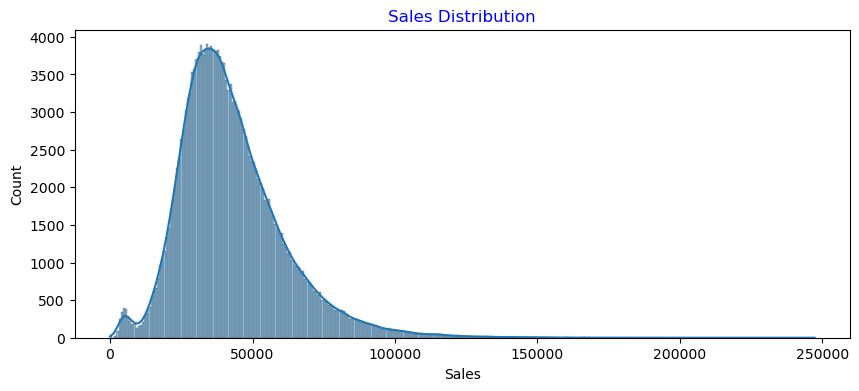

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(data['Sales'],kde=True,)
plt.title('Sales Distribution',color='blue')
plt.show()

<font color='blue'>
    
- There are outliers present.   
- Right tail distribution.</font>


In [13]:
data['Sales'].quantile(0.99)

102159.0

<font color= 'blue'>

- 99% of data has sales less than 102159.0 so lets remove the 1% data which has sales > 102159.0 to treat outliers</font>

In [14]:
data=data[data['Sales']<=data_copy['Sales'].quantile(0.99)]

In [15]:
# lets create copy of data
data_copy=data.copy()

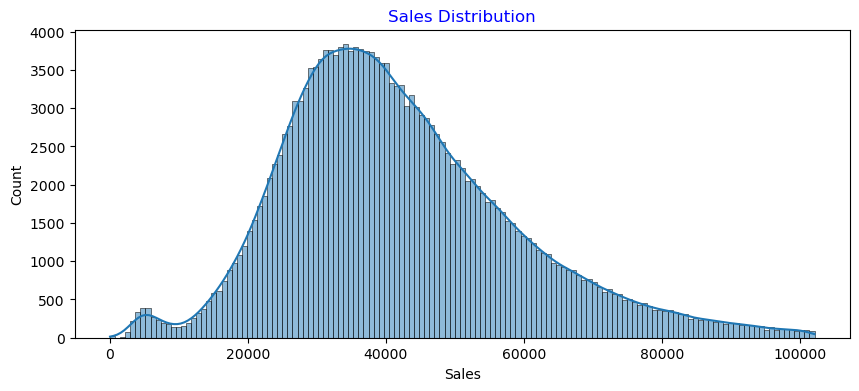

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(data['Sales'],kde=True,)
plt.title('Sales Distribution',color='blue')
plt.show()

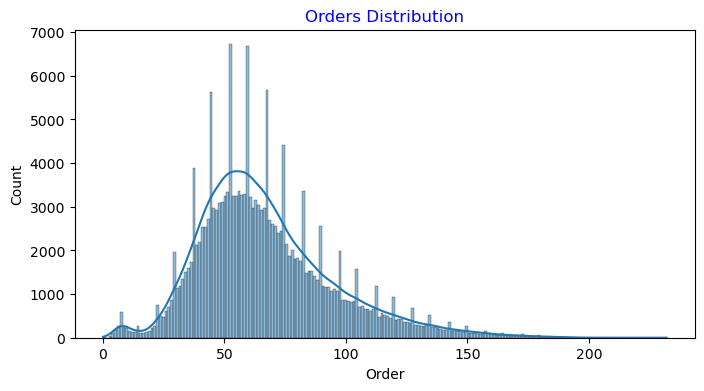

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(data['Order'],kde=True,)
plt.title('Orders Distribution',color='blue')
plt.show()

<AxesSubplot:xlabel='Order'>

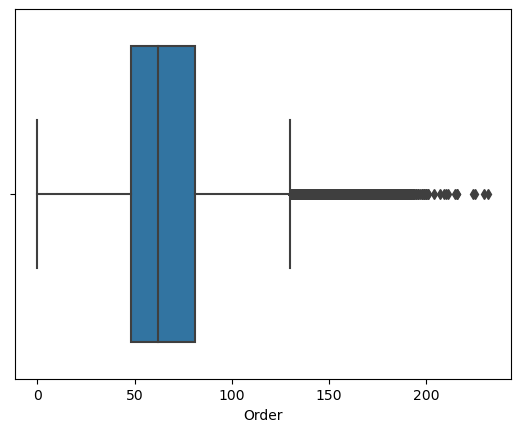

In [18]:
sns.boxplot(data['Order'])

<font color='blue'>

- Orders distribution same as Sales.
- few outliers are there but not extreme outliers, we will keep them</font>

In [19]:
data['Store_id'].nunique()

365

<font color='blue'>
    
- Total unique stores are 365</font>

### Lets check store count 

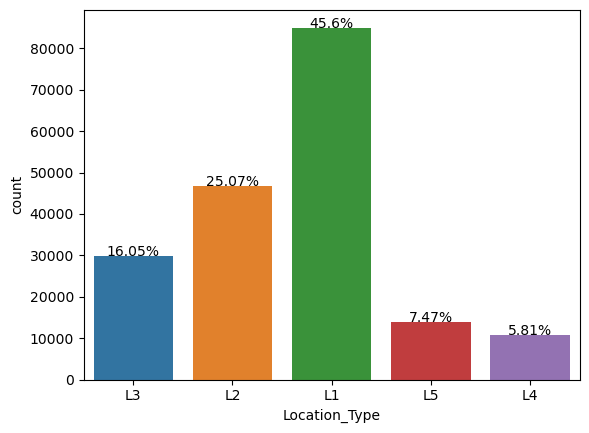

In [20]:
ax=sns.countplot(x=data['Location_Type'])
for p in ax.patches:
    ax.annotate(f'{round(p.get_height()/data.shape[0]*100,2)}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

<font color='blue'>
    
 - L1 location has highest store count (45.6%) and L4 location has lowest store count (5.81%)</font>

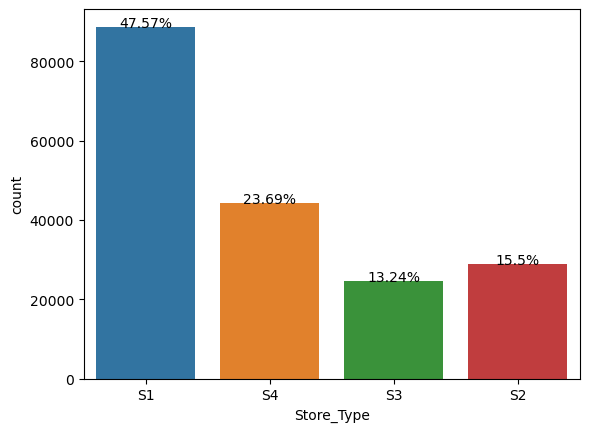

In [21]:
ax=sns.countplot(x=data['Store_Type'])
for p in ax.patches:
    ax.annotate(f'{round(p.get_height()/data.shape[0]*100,2)}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

<font color='blue'>
    
- S1 type store has highest store count (47.57%) and S3 store type has lowest store count (13.24%)</font>

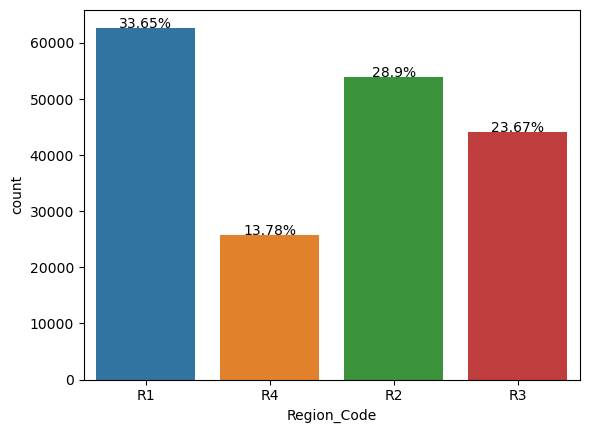

In [22]:
ax=sns.countplot(x=data['Region_Code'])
for p in ax.patches:
    ax.annotate(f'{round(p.get_height()/data.shape[0]*100,2)}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.show()

<font color='blue'>

- R1 region has highest store count (33.65%) and R4 region has lowest store count (13.7%)</font>

## Bivariate Analysis

### Lets check the distribution of sales in different categories

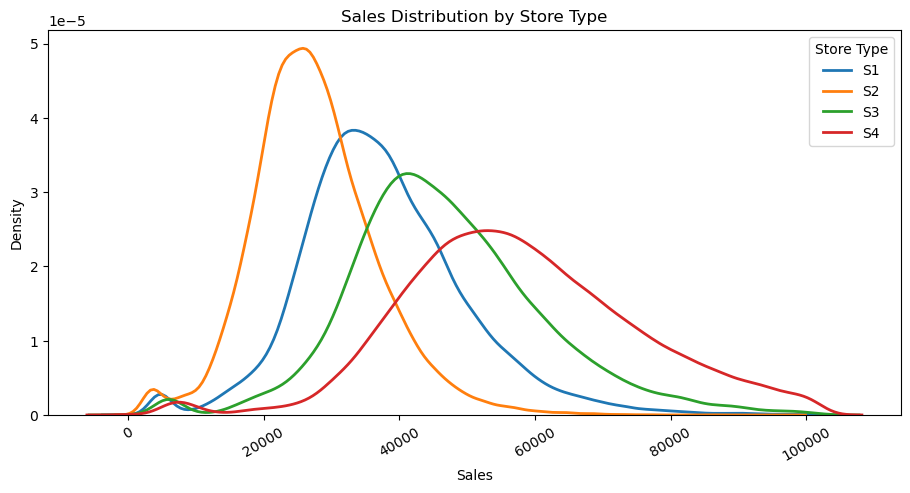

In [23]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Store_Type']=='S1']['Sales'], label='S1', linewidth=2)
sns.kdeplot(data=data[data['Store_Type']=='S2']['Sales'], label='S2', linewidth=2)
sns.kdeplot(data=data[data['Store_Type']=='S3']['Sales'], label='S3', linewidth=2)
sns.kdeplot(data=data[data['Store_Type']=='S4']['Sales'], label='S4', linewidth=2)


plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Sales Distribution by Store Type')
plt.legend(title='Store Type')
plt.show()


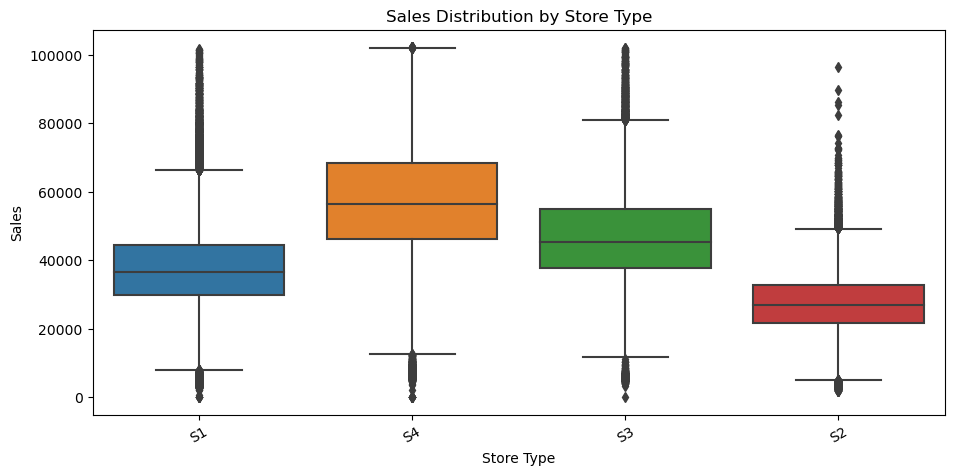

In [24]:
plt.figure(figsize=(11,5))

sns.boxplot(x='Store_Type', y='Sales', data=data)

plt.xticks(rotation=30)
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales Distribution by Store Type')
plt.show()


<font color='blue'>

- S4 store type has most wider spread of sales.
- S4 store type has more sales as compared to other
- And S2 has most narrow spread of sales</font>

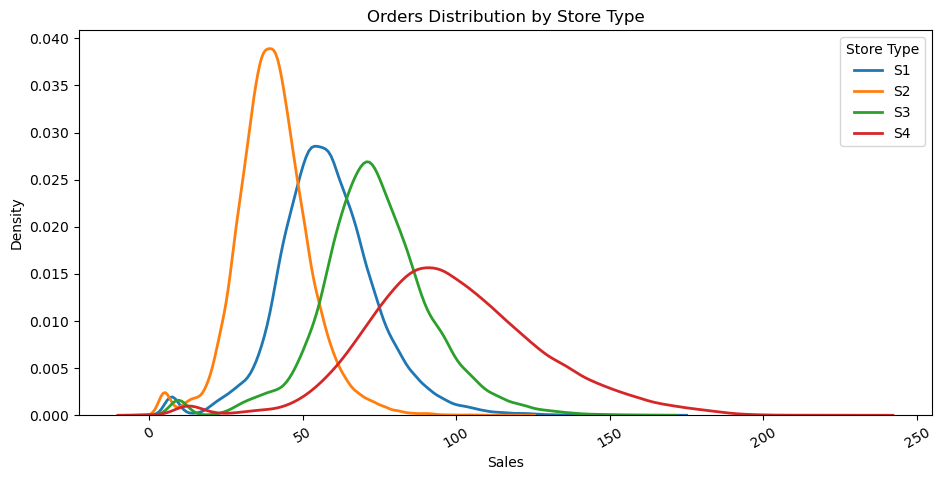

In [25]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Store_Type']=='S1']['Order'], label='S1', linewidth=2)
sns.kdeplot(data=data[data['Store_Type']=='S2']['Order'], label='S2', linewidth=2)
sns.kdeplot(data=data[data['Store_Type']=='S3']['Order'], label='S3', linewidth=2)
sns.kdeplot(data=data[data['Store_Type']=='S4']['Order'], label='S4', linewidth=2)


plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Orders Distribution by Store Type')
plt.legend(title='Store Type')
plt.show()

<font color= 'blue'>
    
- Same distribution as sales</font>

Correlation between Sales and Order: 0.93


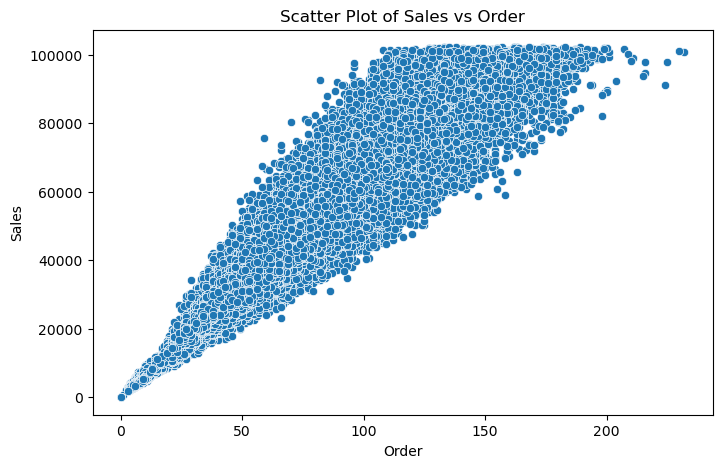

In [26]:
correlation = data['Sales'].corr(data['Order'])
print(f"Correlation between Sales and Order: {correlation:.2f}")
plt.figure(figsize=(8,5))

sns.scatterplot(x='Order', y='Sales', data=data)

plt.xlabel('Order')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales vs Order')
plt.show()


<font color="blue">

- There is high correlation between order and sales. this is obvious.</font>

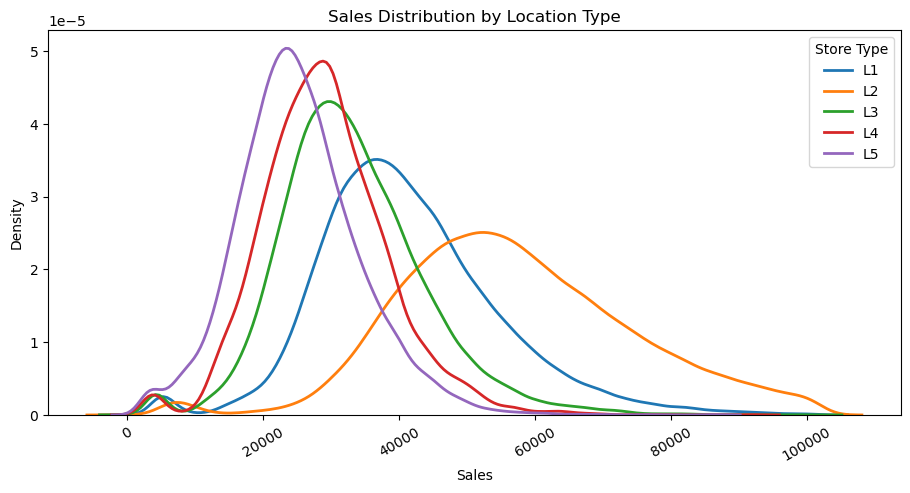

In [27]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Location_Type']=='L1']['Sales'], label='L1', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L2']['Sales'], label='L2', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L3']['Sales'], label='L3', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L4']['Sales'], label='L4', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L5']['Sales'], label='L5', linewidth=2)

plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Sales Distribution by Location Type')
plt.legend(title='Store Type')
plt.show()


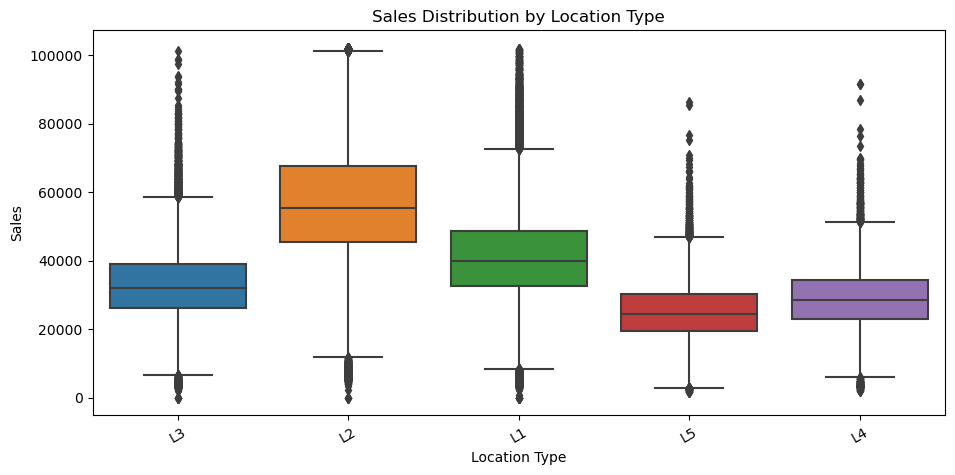

In [28]:
plt.figure(figsize=(11,5))

sns.boxplot(x='Location_Type', y='Sales', data=data)

plt.xticks(rotation=30)
plt.xlabel('Location Type')
plt.ylabel('Sales')
plt.title('Sales Distribution by Location Type')
plt.show()


<font color='blue'>

- l2 location has wider sales.
- l2 location has higher sales as compared to other
- And l5,l4,l3 has narrow sales spread as compared to l2 and l1</font>

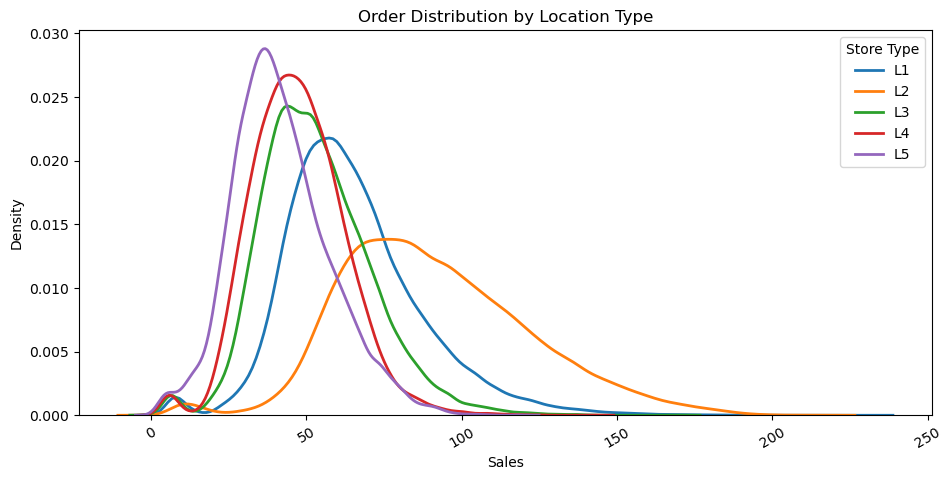

In [29]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Location_Type']=='L1']['Order'], label='L1', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L2']['Order'], label='L2', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L3']['Order'], label='L3', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L4']['Order'], label='L4', linewidth=2)
sns.kdeplot(data=data[data['Location_Type']=='L5']['Order'], label='L5', linewidth=2)

plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Order Distribution by Location Type')
plt.legend(title='Store Type')
plt.show()


<font color= 'blue'>
    
- Same as sales distibution<font>

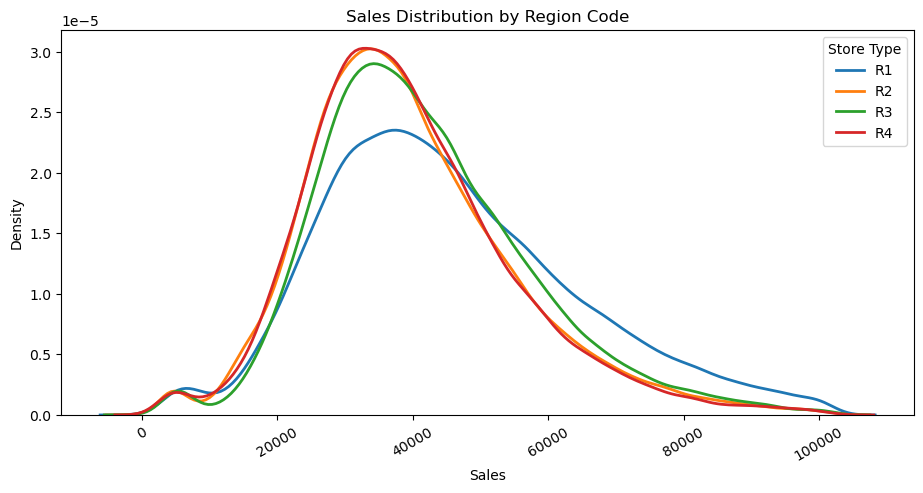

In [30]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Region_Code']=='R1']['Sales'], label='R1', linewidth=2)
sns.kdeplot(data=data[data['Region_Code']=='R2']['Sales'], label='R2', linewidth=2)
sns.kdeplot(data=data[data['Region_Code']=='R3']['Sales'], label='R3', linewidth=2)
sns.kdeplot(data=data[data['Region_Code']=='R4']['Sales'], label='R4', linewidth=2)

plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Sales Distribution by Region Code')
plt.legend(title='Store Type')
plt.show()

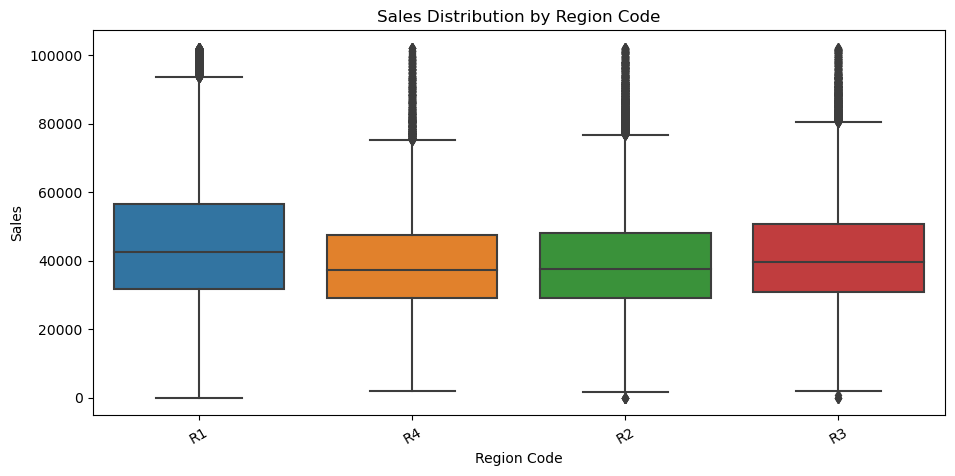

In [31]:
plt.figure(figsize=(11,5))

sns.boxplot(x='Region_Code', y='Sales', data=data)

plt.xticks(rotation=30)
plt.xlabel('Region Code')
plt.ylabel('Sales')
plt.title('Sales Distribution by Region Code')
plt.show()


<font color='blue'>

- Sales in all region almost has same spread.</font>

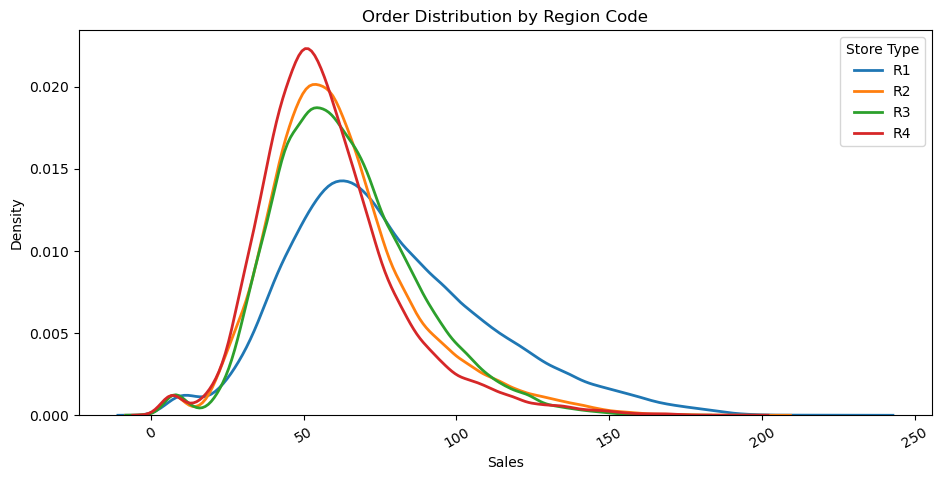

In [32]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Region_Code']=='R1']['Order'], label='R1', linewidth=2)
sns.kdeplot(data=data[data['Region_Code']=='R2']['Order'], label='R2', linewidth=2)
sns.kdeplot(data=data[data['Region_Code']=='R3']['Order'], label='R3', linewidth=2)
sns.kdeplot(data=data[data['Region_Code']=='R4']['Order'], label='R4', linewidth=2)


plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Order Distribution by Region Code')
plt.legend(title='Store Type')
plt.show()

<font color= 'blue'>
    
- Almost has same distribution as sales<font>

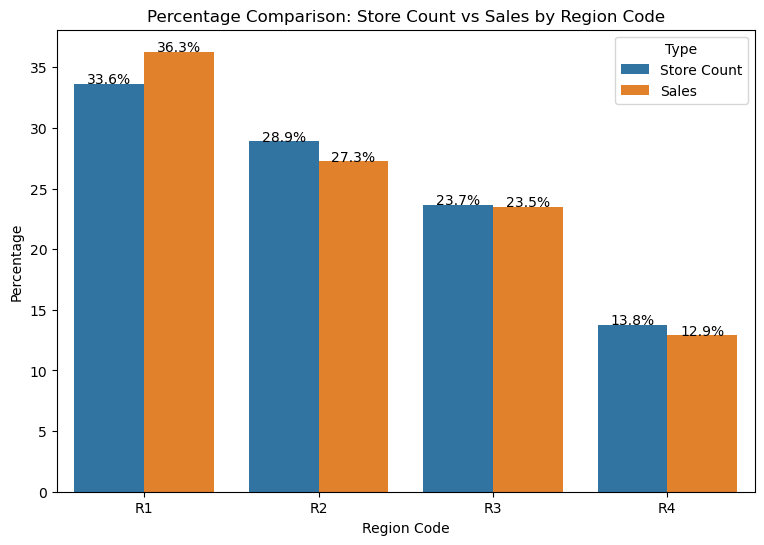

In [33]:
# Calculate percentages
store_count_percentage = data.groupby('Region_Code')['Store_id'].count() / data.shape[0] * 100
sales_percentage = data.groupby('Region_Code')['Sales'].sum() / data['Sales'].sum() * 100

# Prepare data for plotting
store_count_percentage = store_count_percentage.reset_index()
store_count_percentage.columns = ['Region_Code', 'Percentage']
store_count_percentage['Type'] = 'Store Count'

sales_percentage = sales_percentage.reset_index()
sales_percentage.columns = ['Region_Code', 'Percentage']
sales_percentage['Type'] = 'Sales'

# Combine both dataframes
combined_data = pd.concat([store_count_percentage, sales_percentage])

# Create the plot
plt.figure(figsize=(9, 6))
sns.barplot(data=combined_data, x='Region_Code', y='Percentage', hue='Type')

plt.title('Percentage Comparison: Store Count vs Sales by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Percentage')
plt.legend(title='Type')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


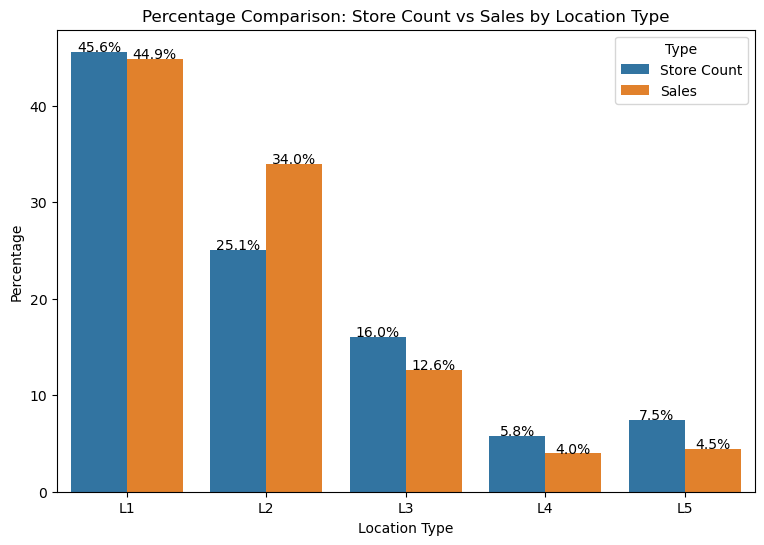

In [34]:
# Calculate percentages
store_count_percentage = data.groupby('Location_Type')['Store_id'].count() / data.shape[0] * 100
sales_percentage = data.groupby('Location_Type')['Sales'].sum() / data['Sales'].sum() * 100

# Prepare data for plotting
store_count_percentage = store_count_percentage.reset_index()
store_count_percentage.columns = ['Location_Type', 'Percentage']
store_count_percentage['Type'] = 'Store Count'

sales_percentage = sales_percentage.reset_index()
sales_percentage.columns = ['Location_Type', 'Percentage']
sales_percentage['Type'] = 'Sales'

# Combine both dataframes
combined_data = pd.concat([store_count_percentage, sales_percentage])

# Create the plot
plt.figure(figsize=(9, 6))
sns.barplot(data=combined_data, x='Location_Type', y='Percentage', hue='Type')

plt.title('Percentage Comparison: Store Count vs Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Percentage')
plt.legend(title='Type')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


<font color= 'blue'>

- Stores in L2 type locations are 25.1% of total no. of stores but they are contributing to 34.0% of total stores.</font>

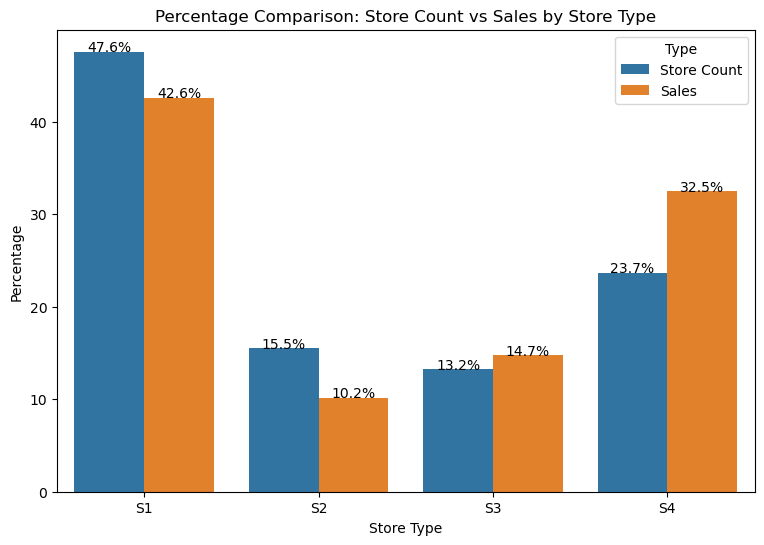

In [35]:
# Calculate percentages
store_count_percentage = data.groupby('Store_Type')['Store_id'].count() / data.shape[0] * 100
sales_percentage = data.groupby('Store_Type')['Sales'].sum() / data['Sales'].sum() * 100

# Prepare data for plotting
store_count_percentage = store_count_percentage.reset_index()
store_count_percentage.columns = ['Store_Type', 'Percentage']
store_count_percentage['Type'] = 'Store Count'

sales_percentage = sales_percentage.reset_index()
sales_percentage.columns = ['Store_Type', 'Percentage']
sales_percentage['Type'] = 'Sales'

# Combine both dataframes
combined_data = pd.concat([store_count_percentage, sales_percentage])

# Create the plot
plt.figure(figsize=(9, 6))
sns.barplot(data=combined_data, x='Store_Type', y='Percentage', hue='Type')

plt.title('Percentage Comparison: Store Count vs Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Percentage')
plt.legend(title='Type')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


<font color='blue'>

- S4 type stores are 23.7% of total no. of stores and they are contributing to 32.5% of Total Sales.</font>

### Let's check impact of holiday and offers on sales

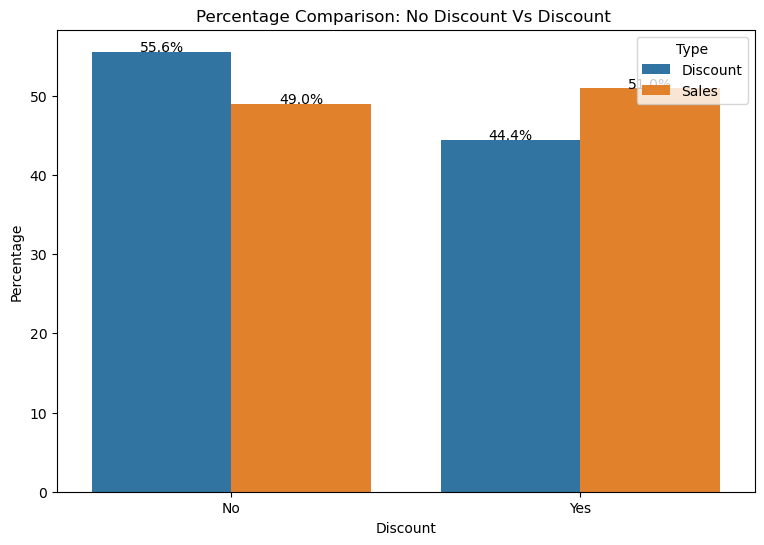

In [36]:
# Calculate percentages
Discount_percentage = data.Discount.value_counts()/data.shape[0] * 100
sales_percentage = data.groupby('Discount')['Sales'].sum() / data['Sales'].sum() * 100

# Prepare data for plotting
Discount_percentage=Discount_percentage.reset_index()
Discount_percentage.columns = ['Discount', 'Percentage']
Discount_percentage['Type'] = 'Discount'

sales_percentage = sales_percentage.reset_index()
sales_percentage.columns = ['Discount', 'Percentage']
sales_percentage['Type'] = 'Sales'

# Combine both dataframes
combined_data = pd.concat([Discount_percentage, sales_percentage])

# Create the plot
plt.figure(figsize=(9, 6))
sns.barplot(data=combined_data, x='Discount', y='Percentage', hue='Type')

plt.title('Percentage Comparison: No Discount Vs Discount ')
plt.xlabel('Discount')
plt.ylabel('Percentage')
plt.legend(title='Type')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


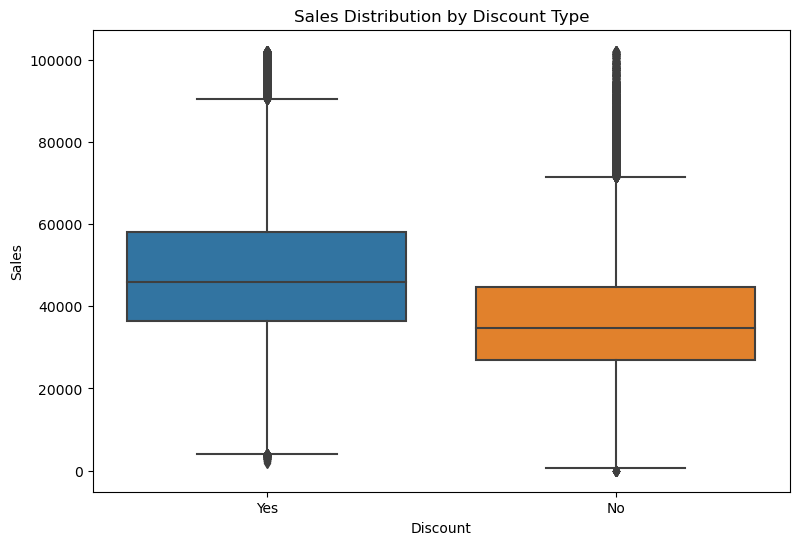

In [37]:
plt.figure(figsize=(9, 6))

sns.boxplot(x='Discount', y='Sales', data=data)

plt.title('Sales Distribution by Discount Type')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


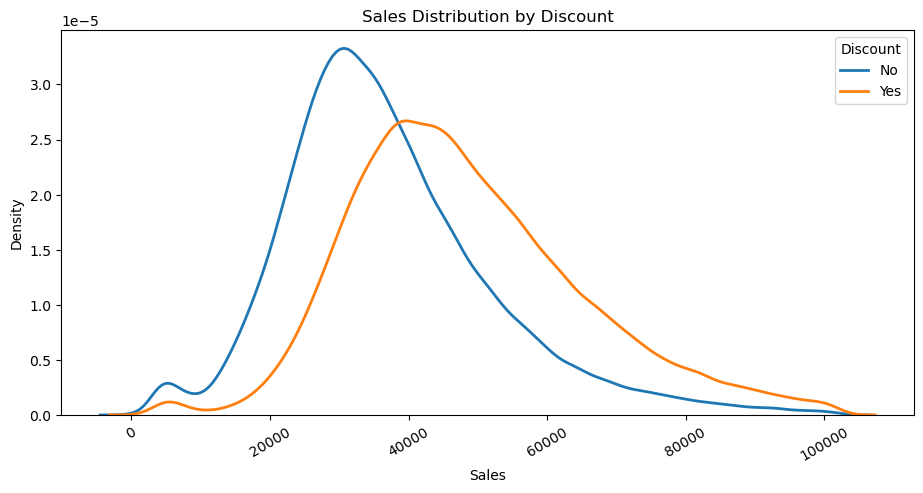

In [38]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Discount']=='No']['Sales'], label='No', linewidth=2)
sns.kdeplot(data=data[data['Discount']=='Yes']['Sales'], label='Yes', linewidth=2)

plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Sales Distribution by Discount')
plt.legend(title='Discount')
plt.show()

<font color= 'blue'>
    
- 44.4% of discounted orders contributing to 51.0% of total Sales.
- We can say that Discount can help to increase in sales</font>

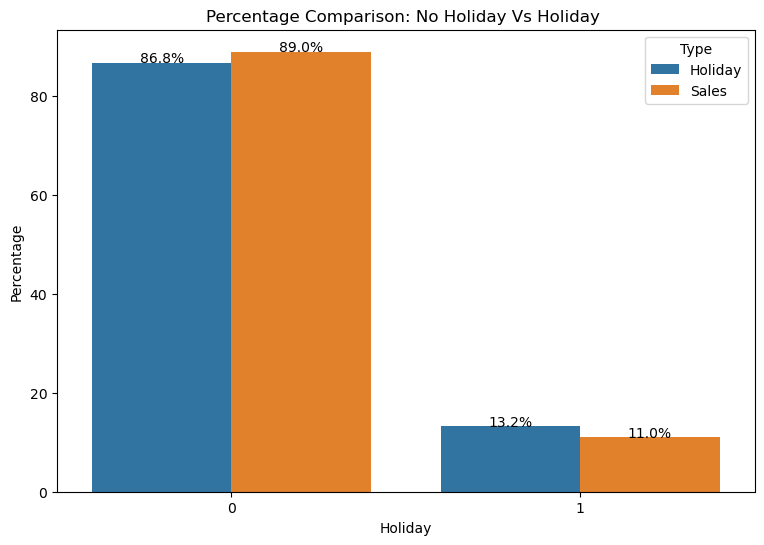

In [39]:
# Calculate percentages
Discount_percentage = data.Holiday.value_counts()/data.shape[0] * 100
sales_percentage = data.groupby('Holiday')['Sales'].sum() / data['Sales'].sum() * 100

# Prepare data for plotting
Discount_percentage=Discount_percentage.reset_index()
Discount_percentage.columns = ['Holiday', 'Percentage']
Discount_percentage['Type'] = 'Holiday'

sales_percentage = sales_percentage.reset_index()
sales_percentage.columns = ['Holiday', 'Percentage']
sales_percentage['Type'] = 'Sales'

# Combine both dataframes
combined_data = pd.concat([Discount_percentage, sales_percentage])

# Create the plot
plt.figure(figsize=(9, 6))
sns.barplot(data=combined_data, x='Holiday', y='Percentage', hue='Type')

plt.title('Percentage Comparison: No Holiday Vs Holiday ')
plt.xlabel('Holiday')
plt.ylabel('Percentage')
plt.legend(title='Type')

# Add percentage labels on top of bars
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plt.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


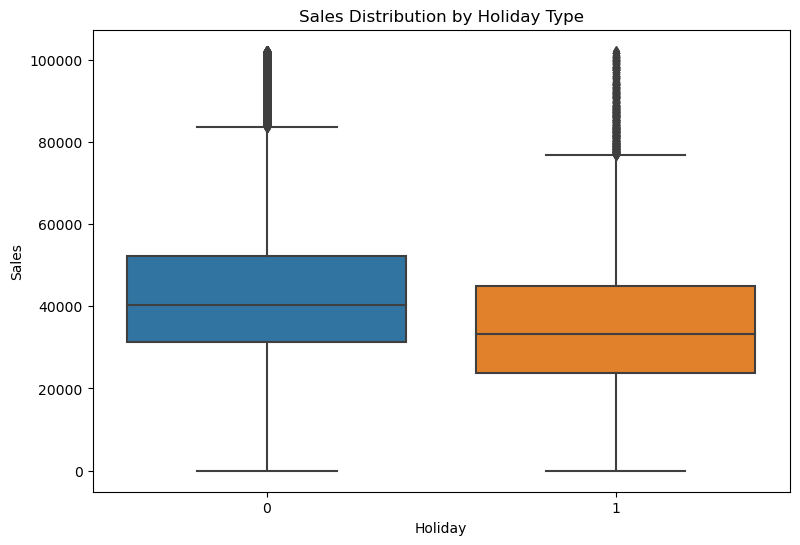

In [40]:
plt.figure(figsize=(9, 6))

sns.boxplot(x='Holiday', y='Sales', data=data)

plt.title('Sales Distribution by Holiday Type')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()


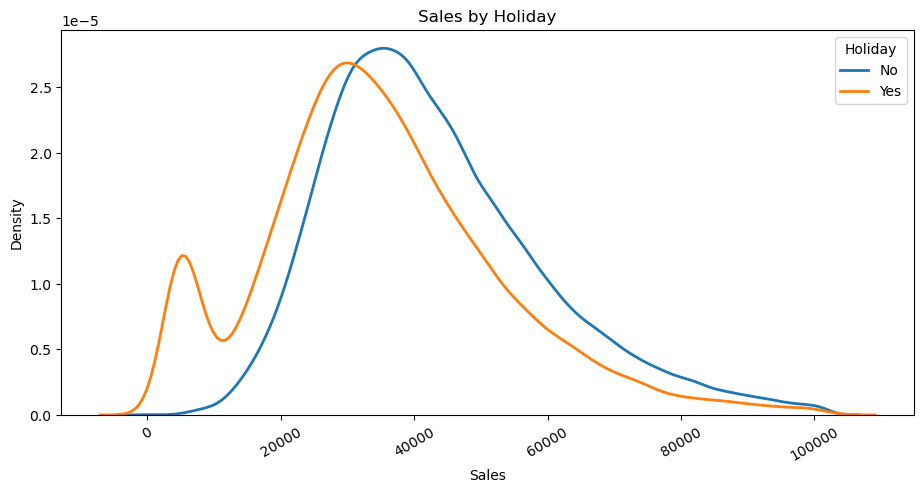

In [41]:
# Plotting KDE distributions of sales for different store types
plt.figure(figsize=(11,5))

sns.kdeplot(data=data[data['Holiday']==0]['Sales'], label='No', linewidth=2)
sns.kdeplot(data=data[data['Holiday']==1]['Sales'], label='Yes', linewidth=2)



plt.xticks(rotation=30)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Sales by Holiday')
plt.legend(title='Holiday')
plt.show()

<font color= "blue">

- No significant impact of holidays on sales.</font>

### Time Series Analysis

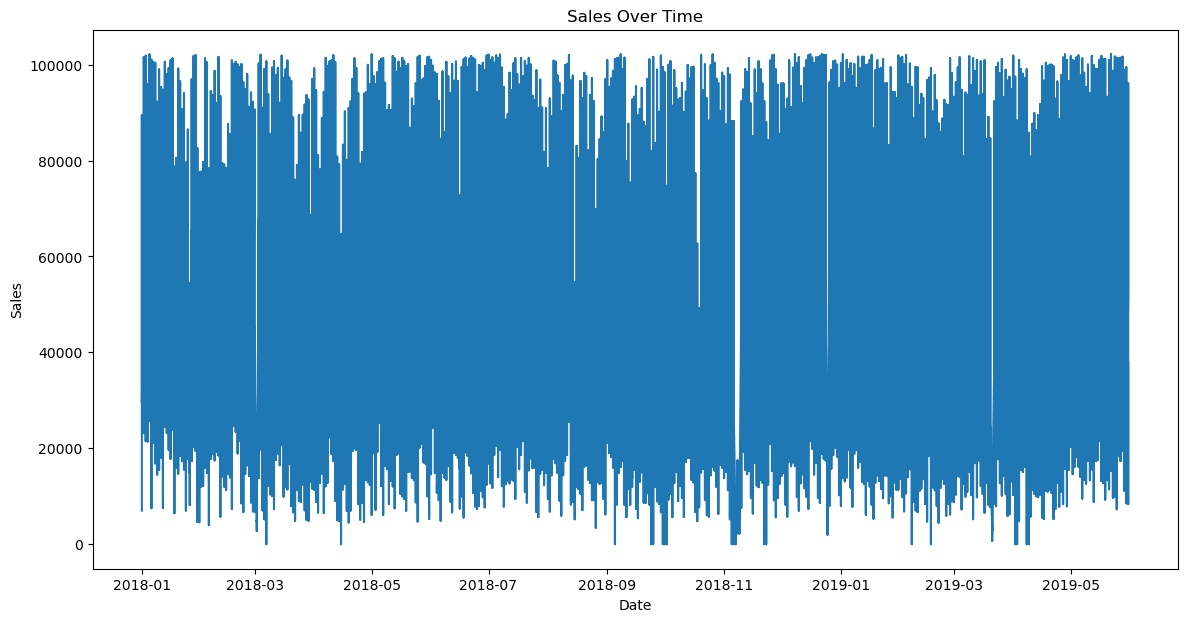

In [42]:
data.set_index('Date', inplace=True)

# Plot sales over time
plt.figure(figsize=(14, 7))
plt.plot(data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

- visually we cant see trend in this time series data

- moving avg helps to smooth out short term fluctuations and so that we can hightlight underlying long term trend.
- But in this case we cant see any trend

In [43]:
aggregated_data = pd.DataFrame(data.groupby('Date')['Sales'].sum())

<Figure size 1400x800 with 0 Axes>

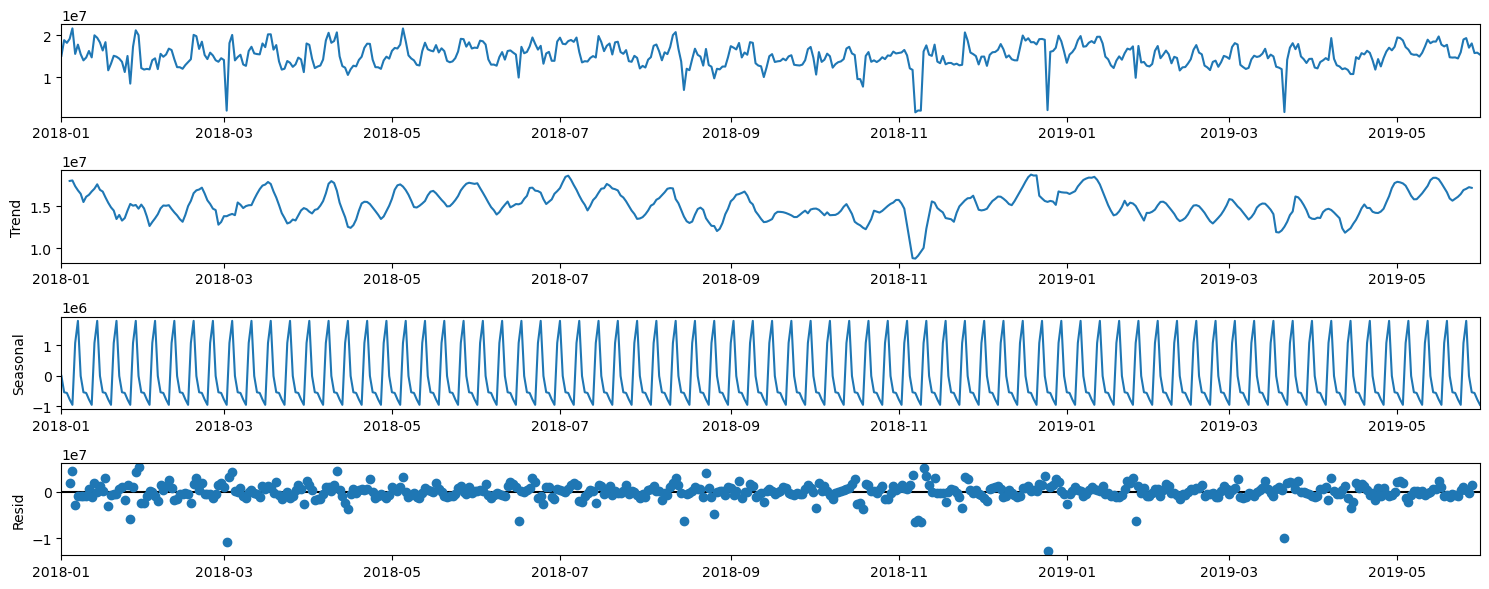

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (15,6)   
decomposition = seasonal_decompose(aggregated_data, model='additive')
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

- Seasonlaity is present but no trend

In [45]:
data

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Order,Sales
Date,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,1,Yes,9,7011.84
2018-01-01,T1000002,253,S4,L2,R1,1,Yes,60,51789.12
2018-01-01,T1000003,252,S3,L2,R1,1,Yes,42,36868.20
2018-01-01,T1000004,251,S2,L3,R1,1,Yes,23,19715.16
2018-01-01,T1000005,250,S2,L3,R4,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...
2019-05-31,T1188336,149,S2,L3,R2,1,Yes,51,37272.00
2019-05-31,T1188337,153,S4,L2,R1,1,No,90,54572.64
2019-05-31,T1188338,154,S1,L3,R2,1,No,56,31624.56


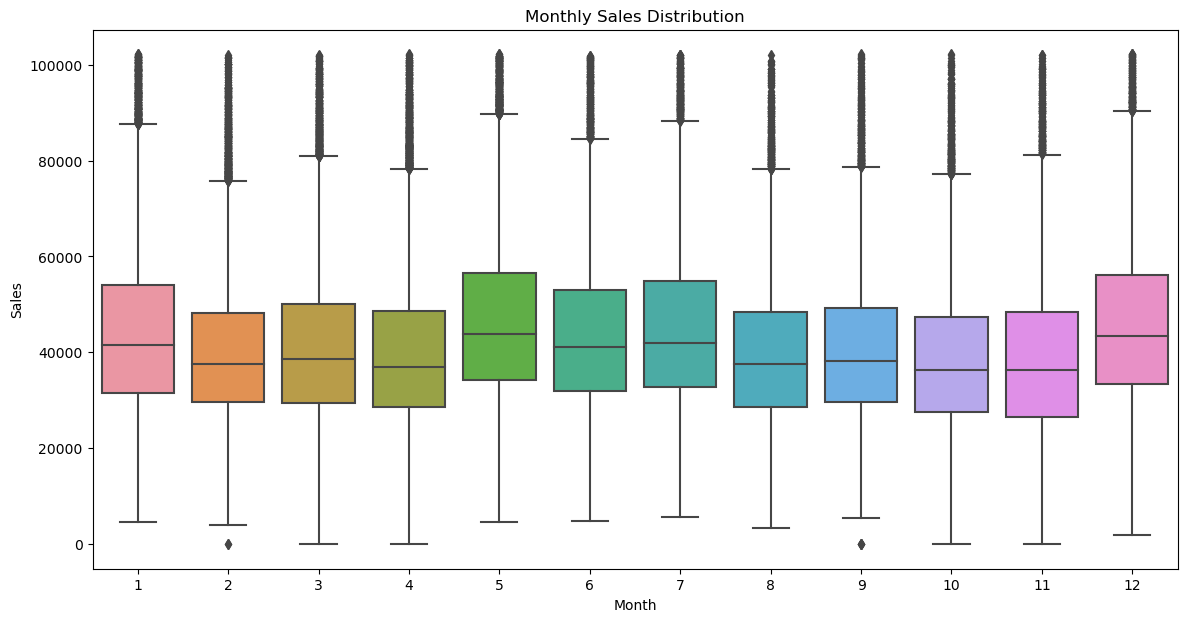

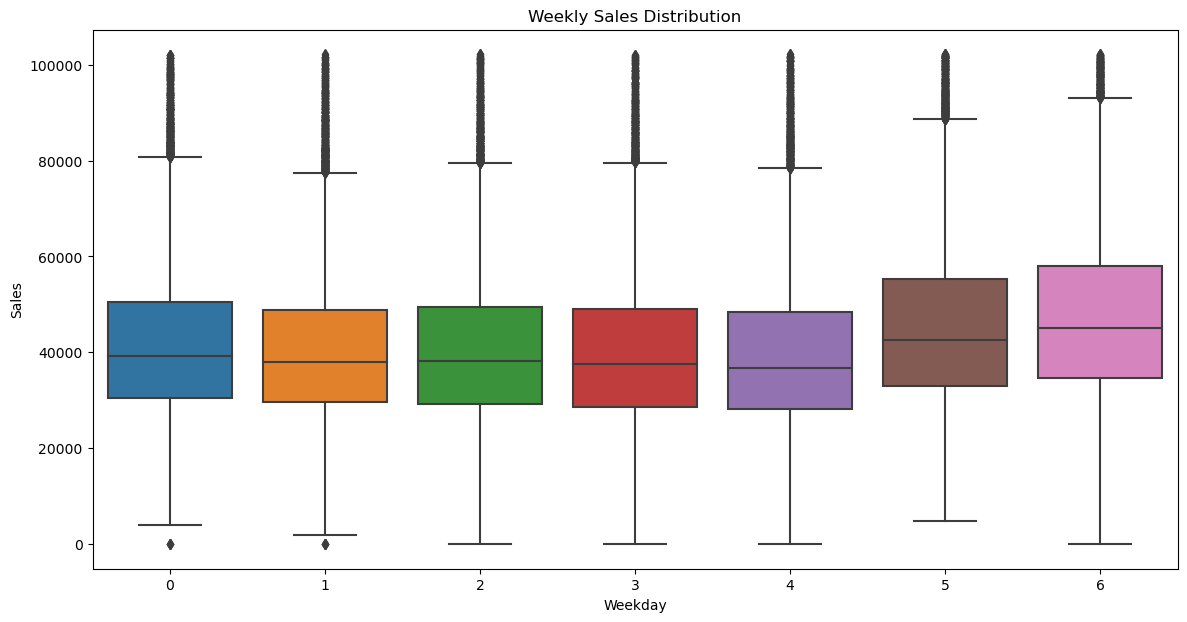

In [46]:
import seaborn as sns

data['Month'] = data.index.month
data['Weekday'] = data.index.weekday

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Sales', data=data.reset_index())
plt.title('Monthly Sales Distribution')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Weekday', y='Sales', data=data.reset_index())
plt.title('Weekly Sales Distribution')
plt.show()


- weekend sale is higher as compared to other weekdays.
- 5 th and 12 th month has higher sale

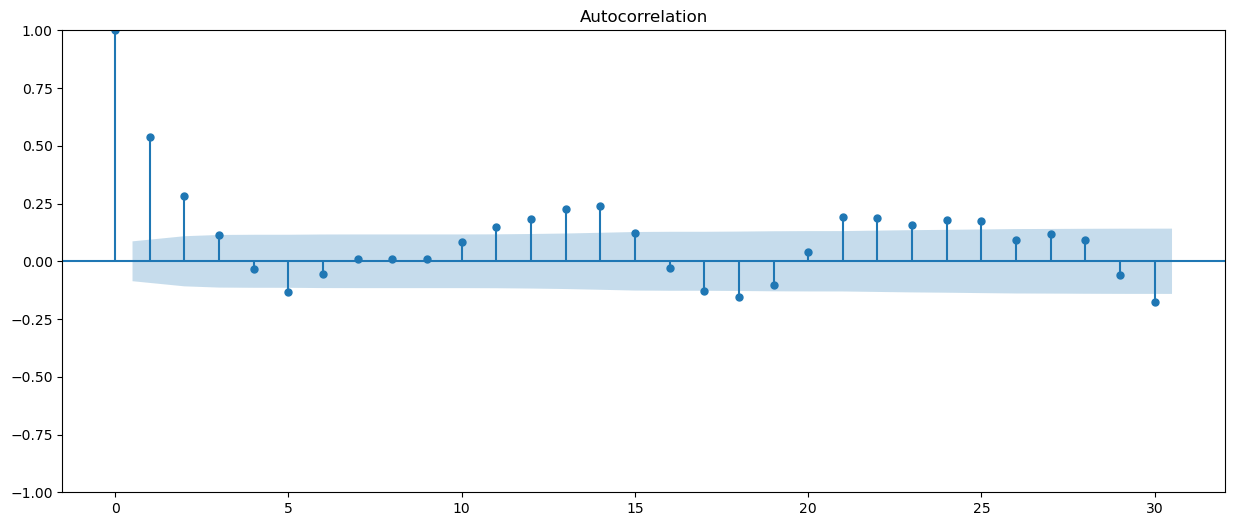

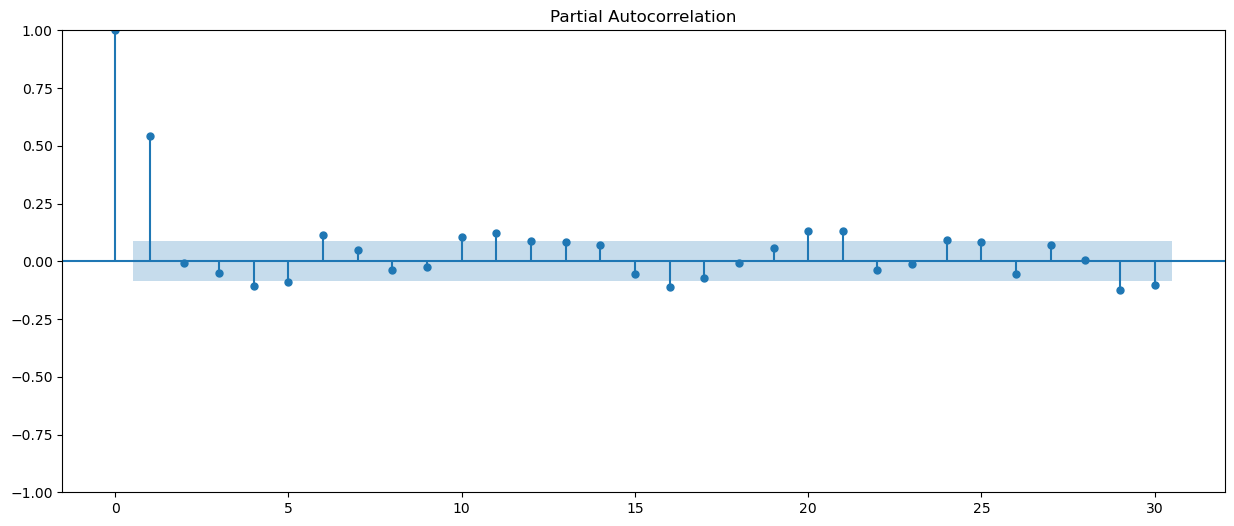

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(aggregated_data, lags=30)
plt.show()

plot_pacf(aggregated_data, lags=30)
plt.show()


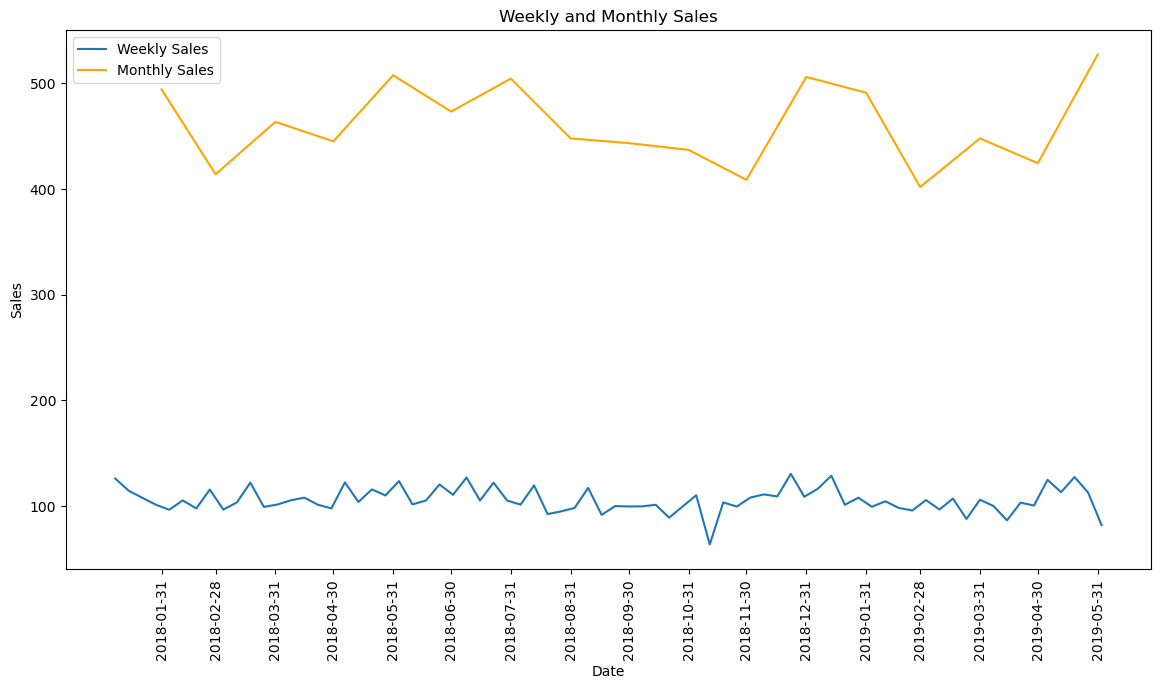

In [48]:
data_weekly = aggregated_data.resample('W')["Sales"].sum()/1000000
data_monthly = aggregated_data.resample('M')["Sales"].sum()/1000000

plt.figure(figsize=(14, 7))
plt.plot(data_weekly, label='Weekly Sales')
plt.plot(data_monthly, label='Monthly Sales', color='orange')
plt.title('Weekly and Monthly Sales')
plt.xticks(aggregated_data.resample("M")['Sales'].sum().index,rotation=90)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

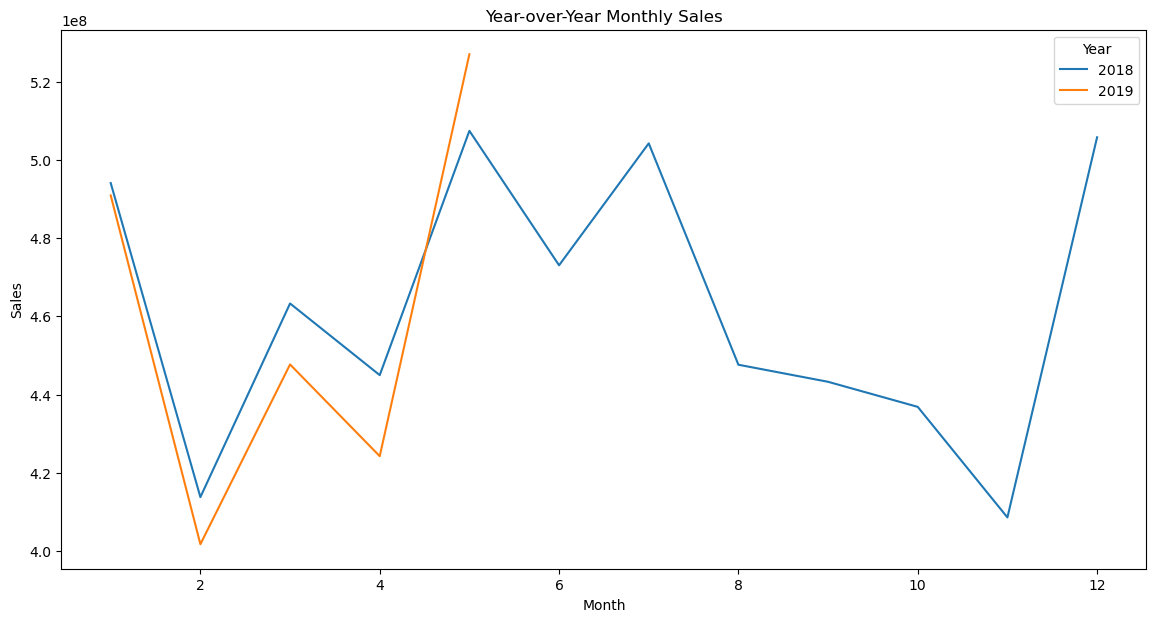

In [49]:
data['Year'] = data.index.year
data['Month'] = data.index.month

pivot_table = data.pivot_table(values='Sales', index='Month', columns='Year', aggfunc='sum')

pivot_table.plot(figsize=(14, 7))
plt.title('Year-over-Year Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


- we have sales data upto may 2019. sales in 2019 following the same pattern as in 2018

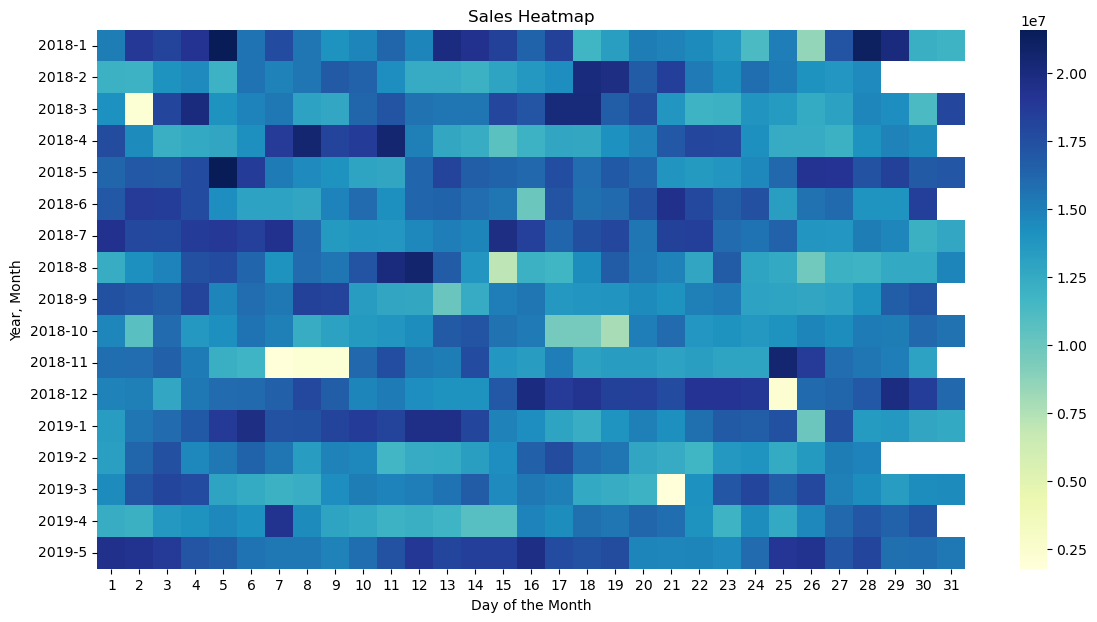

In [50]:
# Assuming aggregated_data is your DataFrame
aggregated_data['Year'] = aggregated_data.index.year
aggregated_data['Month'] = aggregated_data.index.month
aggregated_data['Day'] = aggregated_data.index.day

# Create a pivot table that includes Year, Month, and Day
sales_heatmap = aggregated_data.pivot_table(values='Sales', index=['Year', 'Month'], columns='Day', aggfunc='sum')

plt.figure(figsize=(14, 7))
sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=False, fmt='g')
plt.title('Sales Heatmap')
plt.xlabel('Day of the Month')
plt.ylabel('Year, Month')
plt.show()


- here we can see each day's total sales.
- max sale on 2019-05-4 and second max is on 2018-05-05

In [51]:
data.to_csv("final_data_for_hypothesis.csv")